In [64]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

from collections import deque
import time

from generate_random_graphs import \
    randomize_erm_with_random_edge_count_undirected, \
    randomize_erm_with_nonrandom_edge_count_undirected

### Quick Sanity Check

In [28]:
graph1 = randomize_erm_with_random_edge_count_undirected(4, 0.5)
print(graph1)

graph2 = randomize_erm_with_nonrandom_edge_count_undirected(4, 3)
print(graph2)

{0: [2, 3], 1: [2], 2: [0, 1, 3], 3: [0, 2]}
{0: [2, 3], 1: [2], 2: [1, 0], 3: [0]}


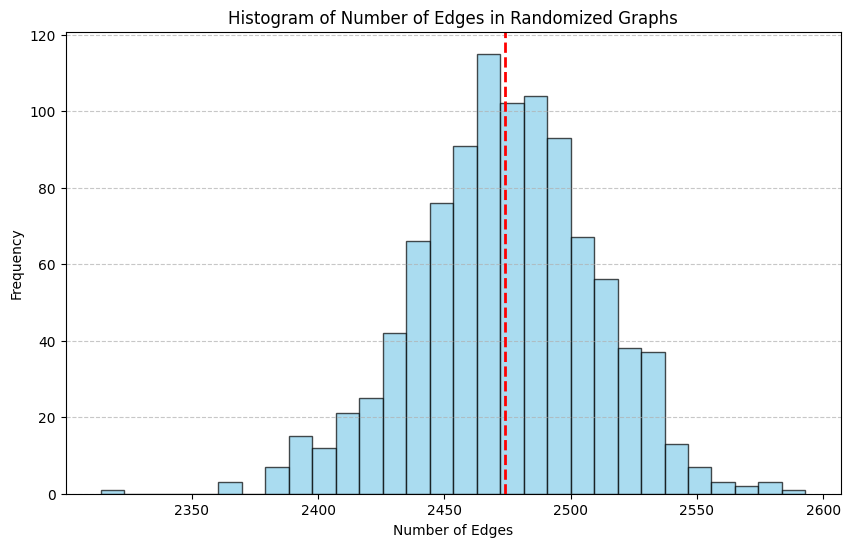

In [ ]:
num_of_trials = 1000
num_of_edges = []
n = 100
p = 0.5
for _ in range(num_of_trials):
    graph = randomize_erm_with_random_edge_count_undirected(n, p)
    edges = 0
    for node in range(n):
        edges += len(graph[node])
    edges //= 2
    num_of_edges.append(edges)

mean_edges = np.mean(num_of_edges)

plt.figure(figsize=(10, 6))
plt.hist(num_of_edges, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean_edges, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_edges:.2f}")
plt.title("Histogram of Number of Edges in Randomized Graphs")
plt.xlabel("Number of Edges")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [63]:
num_of_trials = 1000
occurences = 0 # count occurences of edge (0, 1), should be roughly - 1 / (N choose M)
n = 10
M = 5


for _ in range(num_of_trials):
    graph = randomize_erm_with_nonrandom_edge_count_undirected(n, M)
    occurences += 1 if 1 in graph[0] else 0

total_edges = math.comb(n, 2)
edge_probability = math.comb(total_edges - 1, M - 1) / math.comb(total_edges, M)

print(f"{int(edge_probability * num_of_trials)} ~ {occurences}")

111 ~ 113


### Basic Graph Search Algorithms (BFS and DFS)

#### BFS with random start node and end node

In [65]:
def bfs(start, end, graph):
    t0 = time.time()
    queue = deque([start])
    seen = {start}
    found = False

    while queue:
        node = queue.popleft()
        if node == end:
            found = True
            break
        
        for next_node in graph[node]:
            if next_node in seen:
                continue
            queue.append(next_node)
    
    t1 = time.time()
    process_time = t1 - t0

    return found, process_time

In [69]:
def dfs(start, end, graph):
    found = False

    def search(node, visited):
        nonlocal found
        visited.add(node)
        if found or node == end:
            found = True
            return
        for next_node in graph[node]:
            if next_node in visited:
                continue
            search(next_node, visited)
    
    t0 = time.time()
    search(start, set())
    t1 = time.time()
    process_time = t1 - t0

    return found, process_time

In [79]:
# CHECK THAT DFS/BFS WORKS ON COMPLETED GRAPH
n = 10
completed_graph = randomize_erm_with_random_edge_count_undirected(n, 1)
start, end = 0, n - 1

print(bfs(start, end, completed_graph))
print(dfs(start, end, completed_graph))

(True, 1.1920928955078125e-05)
(True, 9.298324584960938e-06)


#### Completed Graph BFS/DFS Analysis

In [87]:
num_of_trials = 1000
n = 250
completed_graph = randomize_erm_with_random_edge_count_undirected(n, 1)
start, end = 0, n - 1

bfs_runtimes = []
dfs_runtimes = []

for _ in range(num_of_trials):
    curr_bfs_runtime = bfs(start, end, completed_graph)[1]
    curr_dfs_runtime = dfs(start, end, completed_graph)[1]

    bfs_runtimes.append(curr_bfs_runtime)
    dfs_runtimes.append(curr_dfs_runtime)

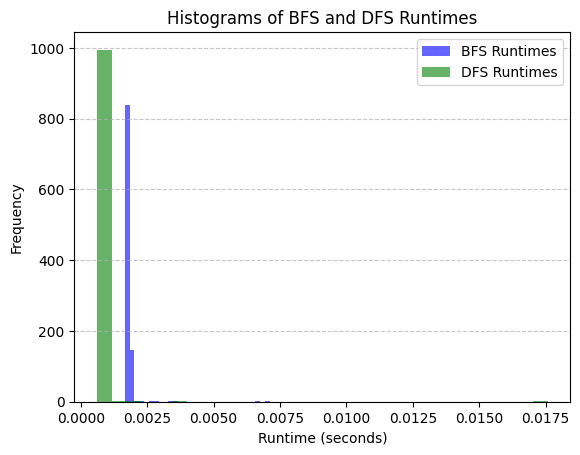

In [90]:
plt.hist(bfs_runtimes, bins=30, color="blue", alpha=0.6, label="BFS Runtimes")
plt.hist(dfs_runtimes, bins=30, color="green", alpha=0.6, label="DFS Runtimes")

plt.title("Histograms of BFS and DFS Runtimes")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
num_of_trials = 1000
n = 50

vertices = [i for i in range(n)]
random.shuffle(vertices)

for _ in range(num_of_trials):


SyntaxError: expected ':' (3203138980.py, line 8)